In [108]:
import requests
import json
import pandas as pd
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import time

def get_data(start, end):
    api_url = "https://api.awattar.de/v1/marketdata"
    df = pd.DataFrame()

    start_timestamp = start
    end_timestamp = end

    params = {
        'start': start_timestamp,
        'end': end_timestamp
    }

    start_time = time.time()
    response = requests.get(api_url, params=params)
    end_time = time.time()

    print(f"took {end_time - start_time:.6f} seconds to execute.")

    if response.status_code == 200:
        data = response.json()

        with open(f'data/api_response_{start}_{end}.json', 'w') as json_file:
            json.dump(data, json_file, indent=4)

        return pd.DataFrame(data["data"])
    else:
        print(f"Fehler bei der Anfrage. Statuscode: {response.status_code}")
        return df

took 0.256202 seconds to execute.
start_timestamp      int64
end_timestamp        int64
marketprice        float64
unit                object
date                object
dtype: object


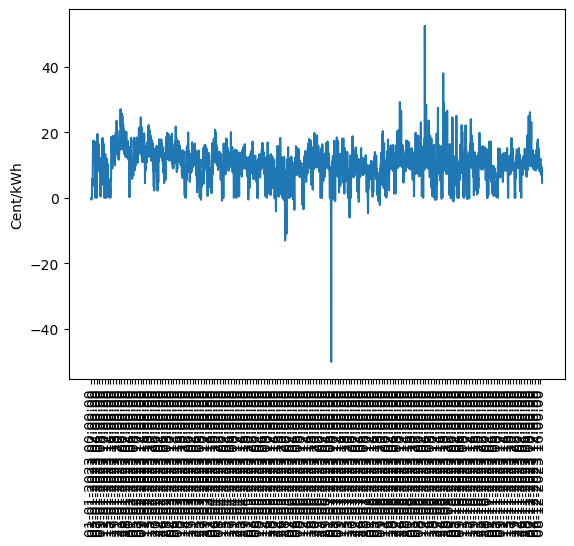

In [109]:
df = get_data(int(datetime(2023, 1, 1).timestamp() * 1000), int(datetime(2023, 12, 31).timestamp() * 1000))
assert not df.empty

df["marketprice"] = (df["marketprice"] * 0.1).round(2)
df["unit"] = "Cent/kWh"
df["date"] = df["start_timestamp"].apply(lambda epoch: datetime.fromtimestamp(epoch / 1000, tz=timezone.utc).strftime('%d-%m-%Y %H:%M:%S'))
df.drop(0, axis=0, inplace=True)
# df = df.head(100)

print(df.dtypes)
plt.plot(df["date"], df["marketprice"])
plt.ylabel(df["unit"].iloc[0])
plt.xticks(df["date"][::50], rotation=90)
plt.show()

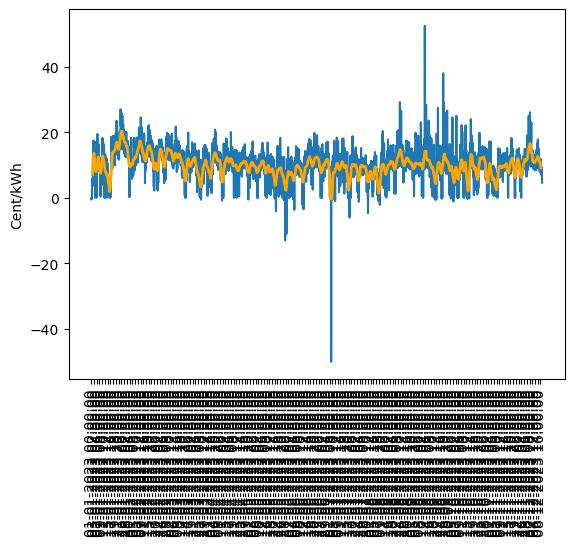

In [110]:
rolling_mean = df["marketprice"].rolling(window=48, center=True).mean()
# df = df.head(100)

plt.plot(df["date"], df["marketprice"], label='Original Data', linestyle='-')
plt.plot(df["date"], rolling_mean, label='Rolling Average', linestyle='-', linewidth=2, color='orange')

plt.ylabel(df["unit"].iloc[0])
plt.xticks(df["date"][::50], rotation=90)
plt.show()

In [111]:
print(df.shape)

df

(8231, 5)


,start_timestamp,end_timestamp,marketprice,unit,date
1,1672531200000,1672534800000,-0.11,Cent/kWh,01-01-2023 00:00:00
2,1672534800000,1672538400000,-0.15,Cent/kWh,01-01-2023 01:00:00
3,1672538400000,1672542000000,-0.51,Cent/kWh,01-01-2023 02:00:00
4,1672542000000,1672545600000,-0.45,Cent/kWh,01-01-2023 03:00:00
5,1672545600000,1672549200000,-0.54,Cent/kWh,01-01-2023 04:00:00
...,...,...,...,...,...
8227,1702144800000,1702148400000,6.94,Cent/kWh,09-12-2023 18:00:00
8228,1702148400000,1702152000000,6.45,Cent/kWh,09-12-2023 19:00:00
8229,1702152000000,1702155600000,6.04,Cent/kWh,09-12-2023 20:00:00
8230,1702155600000,1702159200000,5.68,Cent/kWh,09-12-2023 21:00:00


In [122]:
df2 = pd.read_csv("data/Gro_handelspreise_202301010000_202312092359_Stunde.csv", delimiter=";")
df2 = df2[["Datum", "Anfang", "Ende", "Deutschland/Luxemburg [€/MWh] Originalauflösungen"]]
df2.rename(columns={"Deutschland/Luxemburg [€/MWh] Originalauflösungen": "marketprice"}, inplace=True)
df2["unit"] = "Cent/kWh"

df2['date'] = pd.to_datetime(df2['Datum'] + ' ' + df2['Anfang'].astype(str), format='%d.%m.%Y %H:%M')

df.drop(0, axis=0, inplace=True)

df2

,Datum,Anfang,Ende,marketprice,unit,date
0,01.01.2023,00:00,01:00,"-5,17",Cent/kWh,2023-01-01 00:00:00
1,01.01.2023,01:00,02:00,"-1,07",Cent/kWh,2023-01-01 01:00:00
2,01.01.2023,02:00,03:00,"-1,47",Cent/kWh,2023-01-01 02:00:00
3,01.01.2023,03:00,04:00,"-5,08",Cent/kWh,2023-01-01 03:00:00
4,01.01.2023,04:00,05:00,"-4,49",Cent/kWh,2023-01-01 04:00:00
...,...,...,...,...,...,...
8227,09.12.2023,19:00,20:00,"69,45",Cent/kWh,2023-12-09 19:00:00
8228,09.12.2023,20:00,21:00,"64,46",Cent/kWh,2023-12-09 20:00:00
8229,09.12.2023,21:00,22:00,"60,41",Cent/kWh,2023-12-09 21:00:00
8230,09.12.2023,22:00,23:00,"56,84",Cent/kWh,2023-12-09 22:00:00
